In [1]:
cd desktop


/Users/apple/Desktop


In [2]:
cd ieee-fraud-detection

/Users/apple/Desktop/ieee-fraud-detection


In [3]:
ls

sample_submission.csv* test_transaction.csv*  train_transaction.csv*
test_identity.csv*     train_identity.csv*


In [104]:
import pandas as pd 
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Explororatory Data Analysis 

In [5]:
a = pd.read_csv("train_transaction.csv")
b = pd.read_csv("train_identity.csv")
c = pd.read_csv("test_transaction.csv")
d = pd.read_csv("test_identity.csv")

In [124]:
a.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### BASIC ANALYSIS

In [125]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [126]:
a.shape

(590540, 394)

In [127]:
b.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [128]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [129]:
b.shape

(144233, 41)

In [130]:
c.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [132]:
c.shape

(506691, 393)

In [133]:
d.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [134]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
TransactionID    141907 non-null int64
id_01            141907 non-null float64
id_02            136976 non-null float64
id_03            66481 non-null float64
id_04            66481 non-null float64
id_05            134750 non-null float64
id_06            134750 non-null float64
id_07            5059 non-null float64
id_08            5059 non-null float64
id_09            74338 non-null float64
id_10            74338 non-null float64
id_11            136778 non-null float64
id_12            141907 non-null object
id_13            130286 non-null float64
id_14            71357 non-null float64
id_15            136977 non-null object
id_16            125747 non-null object
id_17            135966 non-null float64
id_18            50875 non-null float64
id_19            135906 non-null float64
id_20            135633 non-null float64
id_21            5059 non-null float64
id_2

In [171]:
# Merge data

In [135]:
train = pd.merge(a,b, on = 'TransactionID', how='left')
test = pd.merge(c,d, on = 'TransactionID', how='left') 

In [153]:
train.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

target ratio is 3.5 percent


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


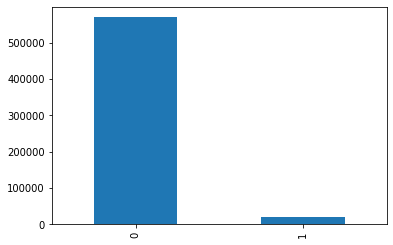

In [154]:
train.isFraud.value_counts().plot('bar')
print('target ratio is', round(20663/len(train)*100,2) , 'percent')

In [155]:
pd.options.display.float_format = '{:.2f}'.format
train.TransactionDT.describe()

count     590540.00
mean     7372311.31
std      4617223.65
min        86400.00
25%      3027057.75
50%      7306527.50
75%     11246620.00
max     15811131.00
Name: TransactionDT, dtype: float64

In [156]:
test.TransactionDT.describe()

count     506691.00
mean    26929937.23
std      4756506.71
min     18403224.00
25%     22771540.50
50%     27204658.00
75%     31348560.50
max     34214345.00
Name: TransactionDT, dtype: float64

#### Dataset columns types

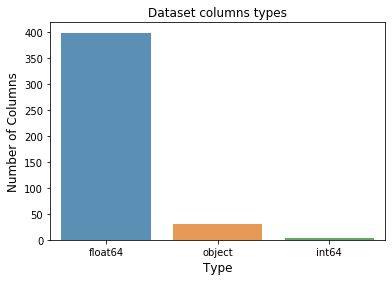

In [147]:
type_count = train.dtypes.value_counts()
sns.barplot(type_count.index.astype('str'), type_count.values, alpha=0.8)
plt.title('Dataset columns types')
plt.ylabel('Number of Columns', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

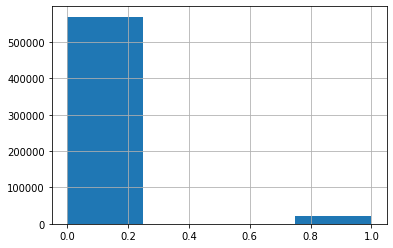

In [160]:
train['isFraud'].hist(bins =4)

#### Distribution of train data 

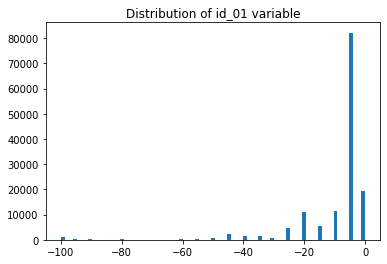

In [159]:
plt.hist(train['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

#### Analysis of categorical variable 

In [166]:
#https://www.kaggle.com/shalind/extensive-data-exploration-and-eda-using-sns-ieee
train.select_dtypes(exclude=['int','float']).describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


In [136]:
#Splitting data into categorical and numerical
categorial = train.select_dtypes(include = ['object'])
numerical = train.select_dtypes(exclude = ['object']) 

In [137]:
categorial.head(10).T

,0,1,2,3,4,5,6,7,8,9
ProductCD,W,W,W,W,H,W,W,W,H,W
card4,discover,mastercard,visa,mastercard,mastercard,visa,visa,visa,visa,mastercard
card6,credit,credit,debit,debit,credit,debit,debit,debit,debit,debit
P_emaildomain,NaN,gmail.com,outlook.com,yahoo.com,gmail.com,gmail.com,yahoo.com,mail.com,anonymous.com,yahoo.com
R_emaildomain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1,T,NaN,T,NaN,NaN,T,T,NaN,NaN,T
M2,T,NaN,T,NaN,NaN,T,T,NaN,NaN,T
M3,T,NaN,T,NaN,NaN,T,T,NaN,NaN,T
M4,M2,M0,M0,M0,NaN,M1,M0,M0,NaN,M0
M5,F,T,F,T,NaN,F,F,F,NaN,T


In [138]:
categorial.describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


#### DATA VISUALIZATION TO UNDERSTAND THE DATA 

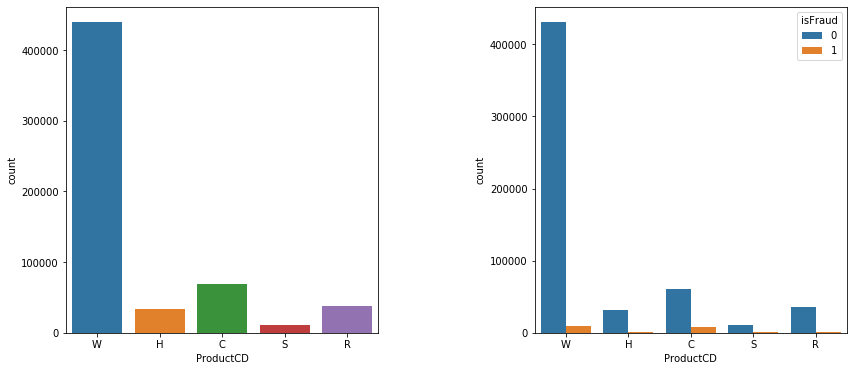

In [139]:
# ProductCD Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('ProductCD', data = categorial, ax=ax[0])
sns.countplot(categorial['ProductCD'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

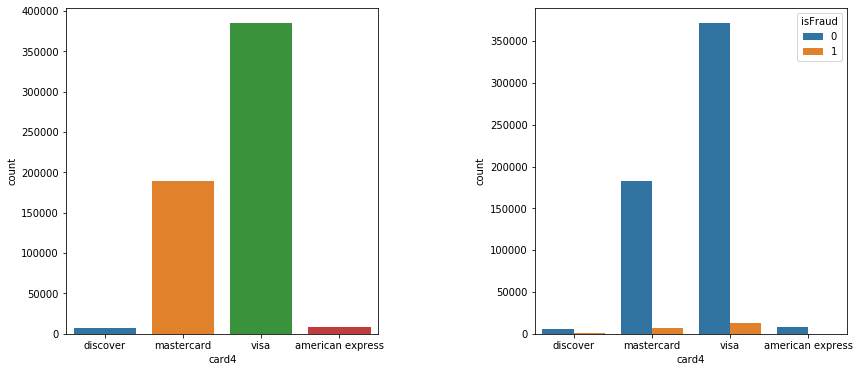

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('card4', data = categorial, ax=ax[0])
sns.countplot(categorial['card4'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

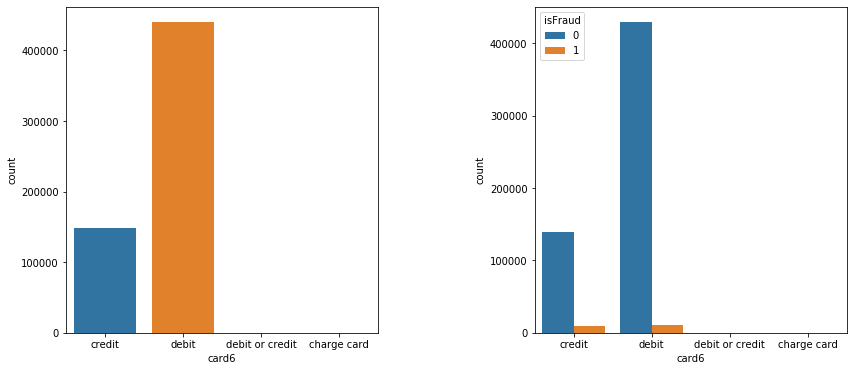

In [141]:
# Card6 Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('card6', data = categorial, ax=ax[0])
sns.countplot(categorial['card6'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

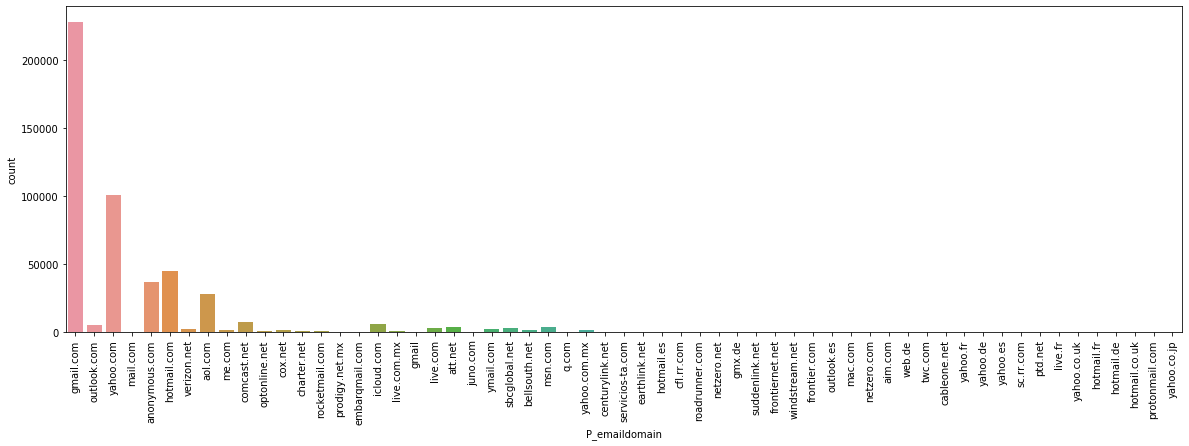

In [142]:
plt.figure(figsize=(20, 6))
sns.countplot('P_emaildomain', data = categorial)
plt.xticks(rotation=90)
plt.show()

In [143]:
temp = pd.DataFrame(categorial['P_emaildomain'].value_counts())
temp['%cent'] = temp['P_emaildomain']/temp['P_emaildomain'].sum()*100
temp['others'] = np.where(temp['%cent'] > 1, temp.index, 'others')
p_email_mapping = temp['others'].to_dict()
categorial['P_emaildomain_new'] = categorial['P_emaildomain'].map(p_email_mapping)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


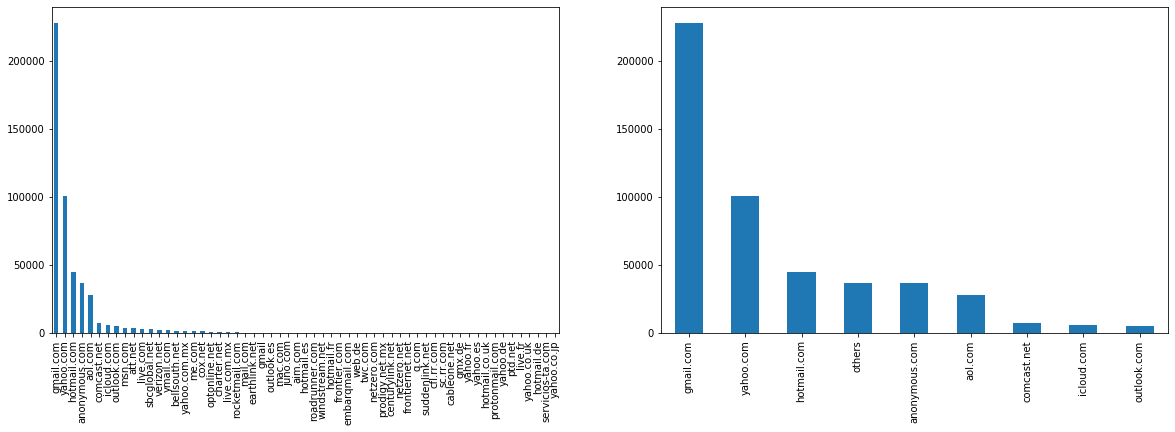

In [144]:
# P_email and P_email_new Analysis
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
categorial['P_emaildomain'].value_counts().plot(kind = 'bar', ax = ax[0])
categorial['P_emaildomain_new'].value_counts().plot(kind = 'bar', ax = ax[1])
plt.show()

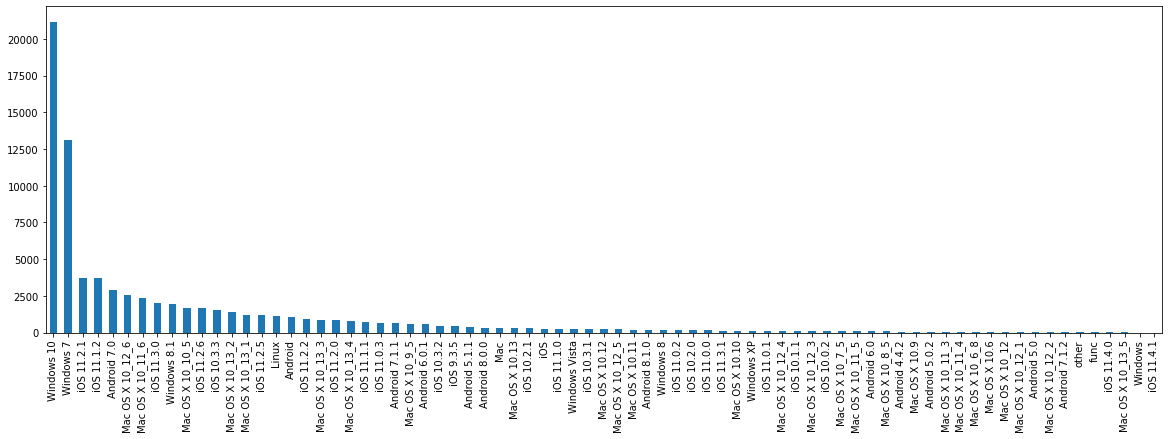

In [145]:
plt.figure(figsize=(20, 6))
categorial['id_30'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Counts')

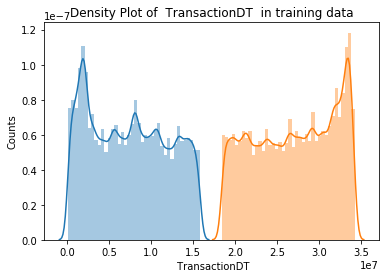

In [149]:
#https://www.kaggle.com/sundaramoorthyks/eda-feature-engineering
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
sns.distplot(train['TransactionDT'], hist=True, kde=True,bins=40) # its shows histogram along with the density plot
sns.distplot(test['TransactionDT'],hist=True,kde=True,bins=40)
plt.title('Density Plot of  TransactionDT  in training data')
plt.xlabel(' TransactionDT')
plt.ylabel('Counts')

#### ProductCD frequency

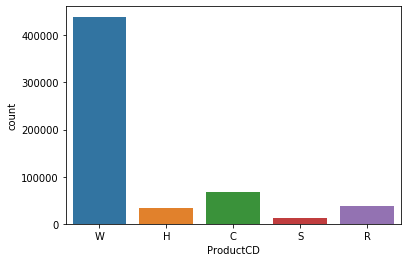

In [150]:
sns.countplot(x="ProductCD", data=train) # shows the count in each class

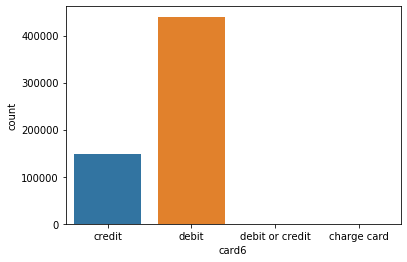

In [151]:
sns.countplot(x=train['card6'])

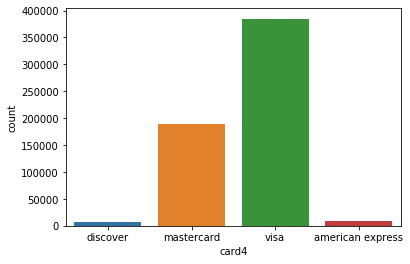

In [152]:
sns.countplot(train['card4'])

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  


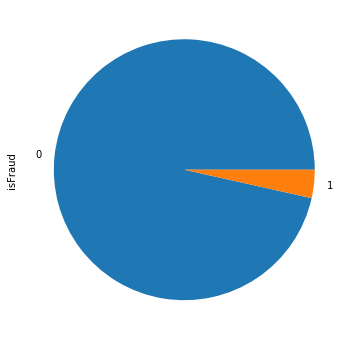

In [168]:
plt.subplots(figsize = (6,6))
train['isFraud'].value_counts().plot('pie')
plt.show()


###### Number of Observation of train data

In [30]:
train.shape

(590540, 434)

In [81]:
train.columns[14:33]

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'M6'],
      dtype='object')

In [83]:
test.columns[13:33]

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'M6', 'V12'],
      dtype='object')

###### Number of observation of test 

In [31]:
test.shape

(506691, 433)

### Missing data

In [186]:
# https://www.kaggle.com/fchmiel/eda-of-missing-data
isna_tr = train.isna().sum(axis=1)
isna_te = test.isna().sum(axis=1)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


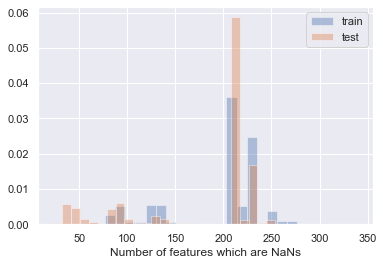

In [185]:
plt.hist(isna_tr, normed=True, bins=30, alpha=0.4, label='train')
plt.hist(isna_te, normed=True, bins=30, alpha=0.4, label='test')
plt.xlabel('Number of features which are NaNs')
plt.legend()

In [172]:
na_rate = pd.DataFrame(train.isna().mean().sort_values(ascending = False), columns=['rate']).reset_index()

In [173]:
na_rate

,index,rate
0,id_24,0.99
1,id_25,0.99
2,id_07,0.99
3,id_08,0.99
4,id_21,0.99
...,...,...
429,C11,0.00
430,C12,0.00
431,C13,0.00
432,C14,0.00


In [174]:
na_rate_col = list(na_rate.loc[na_rate.rate > 0.4]['index'])

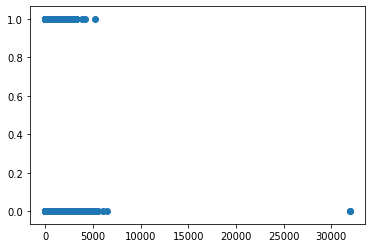

In [176]:
plt.scatter(train.TransactionAmt, train.isFraud)

In [178]:
smaller_df = train.head(500)

In [175]:
#cols_to_remove = missing_values[missing_values>=90].index.tolist()
## Removing above columns from train and test data
#train_merged.drop(cols_to_remove, axis =1, inplace = True)
#test_merged.drop(cols_to_remove, axis =1, inplace = True)

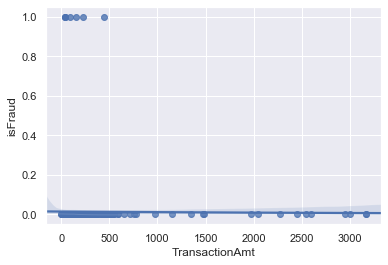

In [179]:
# https://www.kaggle.com/cyberia/eda-logisticreg
import seaborn as sns; sns.set(color_codes = True)
sns.regplot(x = smaller_df.TransactionAmt, y = smaller_df.isFraud, logistic=True)

In [182]:
#sns.regplot(x = train.TransactionAmt, y = train.isFraud, logistic=True)

In [188]:
train = train.drop(columns=na_rate_col)
test = test.drop(columns= na_rate_col)

In [189]:
train.head(5).T

,0,1,2,3,4
TransactionID,2987000,2987001,2987002,2987003,2987004
isFraud,0,0,0,0,0
TransactionDT,86400,86401,86469,86499,86506
TransactionAmt,68.50,29.00,59.00,50.00,50.00
ProductCD,W,W,W,W,H
...,...,...,...,...,...
V317,117.00,0.00,0.00,1404.00,0.00
V318,0.00,0.00,0.00,790.00,0.00
V319,0.00,0.00,0.00,0.00,0.00
V320,0.00,0.00,0.00,0.00,0.00


In [190]:
#Splitting data into categorical and numerical
categorial = train.select_dtypes(include = ['object'])
numerical = train.select_dtypes(exclude = ['object'])

In [191]:
categorial.head(10).T

,0,1,2,3,4,5,6,7,8,9
ProductCD,W,W,W,W,H,W,W,W,H,W
card4,discover,mastercard,visa,mastercard,mastercard,visa,visa,visa,visa,mastercard
card6,credit,credit,debit,debit,credit,debit,debit,debit,debit,debit
P_emaildomain,NaN,gmail.com,outlook.com,yahoo.com,gmail.com,gmail.com,yahoo.com,mail.com,anonymous.com,yahoo.com
M6,T,T,F,F,NaN,T,F,F,NaN,T


In [192]:
numerical.head(10).T

,0,1,2,3,4,5,6,7,8,9
TransactionID,2987000.00,2987001.00,2987002.00,2987003.00,2987004.00,2987005.00,2987006.00,2987007.00,2987008.00,2987009.00
isFraud,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TransactionDT,86400.00,86401.00,86469.00,86499.00,86506.00,86510.00,86522.00,86529.00,86535.00,86536.00
TransactionAmt,68.50,29.00,59.00,50.00,50.00,49.00,159.00,422.50,15.00,117.00
card1,13926.00,2755.00,4663.00,18132.00,4497.00,5937.00,12308.00,12695.00,2803.00,17399.00
...,...,...,...,...,...,...,...,...,...,...
V317,117.00,0.00,0.00,1404.00,0.00,0.00,0.00,0.00,0.00,0.00
V318,0.00,0.00,0.00,790.00,0.00,0.00,0.00,0.00,0.00,0.00
V319,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
V320,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Analysis of Categorical Data

In [193]:
categorial.describe()

,ProductCD,card4,card6,P_emaildomain,M6
count,590540,588963,588969,496084,421180
unique,5,4,4,59,2
top,W,visa,debit,gmail.com,F
freq,439670,384767,439938,228355,227856


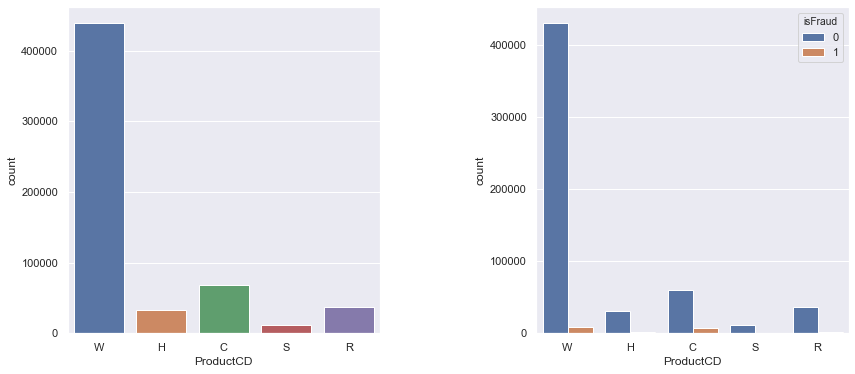

In [194]:
# ProductCD Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('ProductCD', data = categorial, ax=ax[0])
sns.countplot(categorial['ProductCD'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

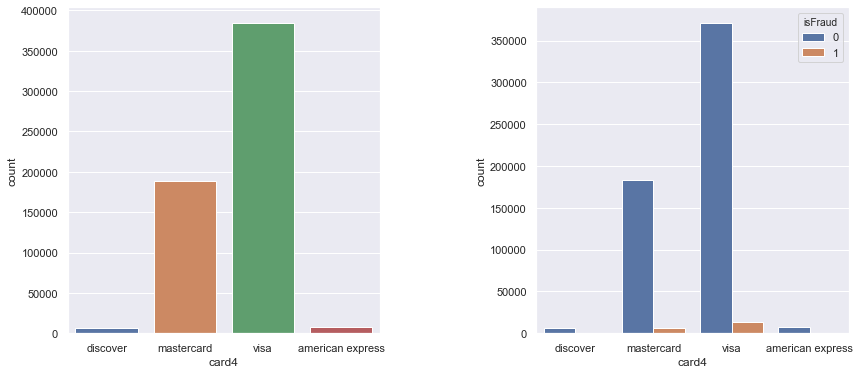

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('card4', data = categorial, ax=ax[0])
sns.countplot(categorial['card4'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

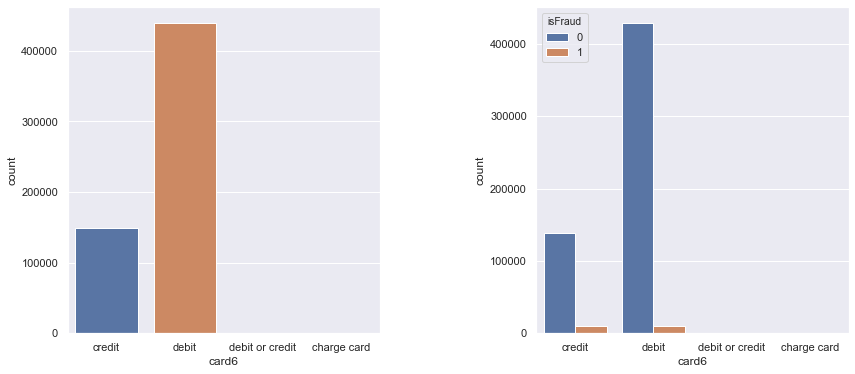

In [196]:
# Card6 Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot('card6', data = categorial, ax=ax[0])
sns.countplot(categorial['card6'], hue = numerical['isFraud'], ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

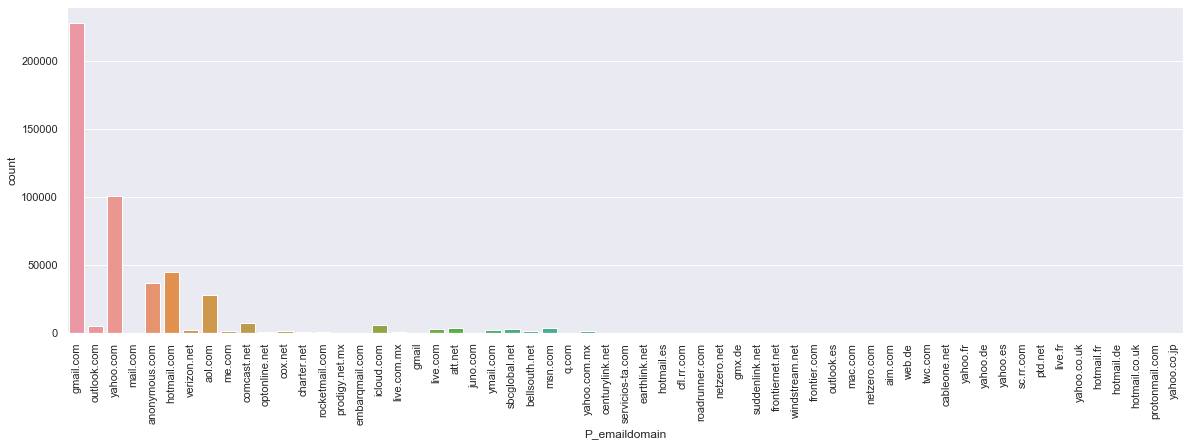

In [197]:
#https://www.kaggle.com/shubham219/basic-eda
plt.figure(figsize=(20, 6))
sns.countplot('P_emaildomain', data = categorial)
plt.xticks(rotation=90)
plt.show()

In [198]:
temp = pd.DataFrame(categorial['P_emaildomain'].value_counts())
temp['%cent'] = temp['P_emaildomain']/temp['P_emaildomain'].sum()*100
temp['others'] = np.where(temp['%cent'] > 1, temp.index, 'others')
p_email_mapping = temp['others'].to_dict()
categorial['P_emaildomain_new'] = categorial['P_emaildomain'].map(p_email_mapping)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


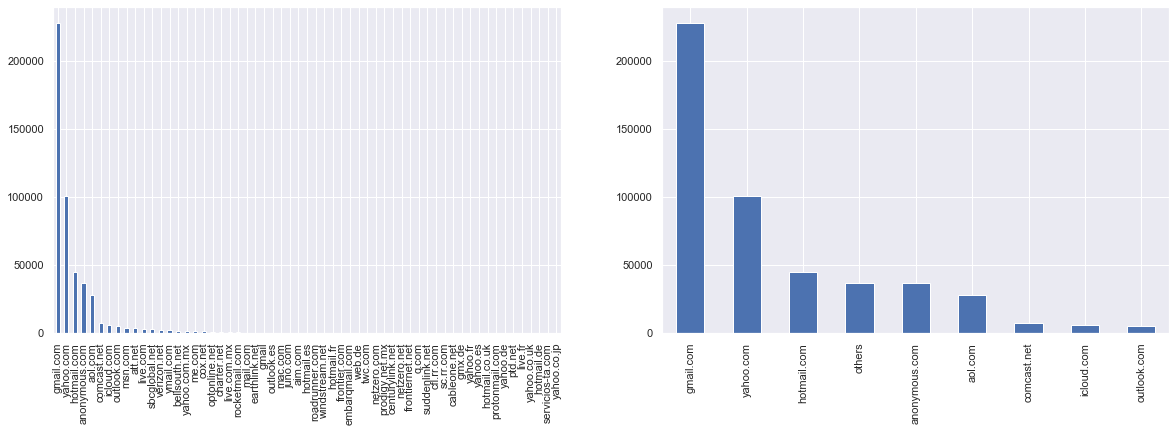

In [199]:
# P_email and P_email_new Analysis
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
categorial['P_emaildomain'].value_counts().plot(kind = 'bar', ax = ax[0])
categorial['P_emaildomain_new'].value_counts().plot(kind = 'bar', ax = ax[1])
plt.show()

In [201]:
X_train = train.drop(columns=['isFraud'])
y_train = train['isFraud']
X_test = test

In [202]:
X_test_orginal = X_test.copy()
X_train = X_train.loc[:,'C1':]
X_test = X_test.loc[:,"C1":]

In [204]:
X_train

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00
1,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,...,135.00,0.00,0.00,0.00,50.00,1404.00,790.00,0.00,0.00,0.00
4,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,...,0.00,47.95,47.95,47.95,0.00,0.00,0.00,0.00,0.00,0.00
590536,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
590537,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
590538,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,...,117.00,317.50,669.50,317.50,0.00,2234.00,0.00,0.00,0.00,0.00


In [205]:
X_train = X_train.drop(columns=['M6'])
X_test = X_test.drop(columns=['M6'])

#### Pie chart of fraud probability

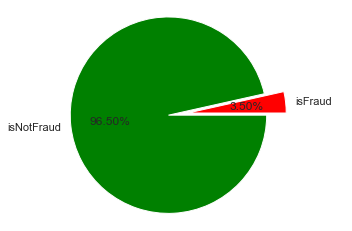

In [222]:
labels = 'isFraud', 'isNotFraud'
sizes = [len(y_train[y_train==1]),len(y_train[y_train==0])]
explode = (0.2, 0)
colors =  ['red','green']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.2f%%')
ax1.axis('equal')

plt.show()

In [ ]:
labels = 'isFraud', 'isNotFraud'
sizes = [len(y_train[y_train==1]),len(y_train[y_train==0])]
explode = (0.2, 0)
colors =  ['red','green']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.2f%%')
ax1.axis('equal')

plt.show()

In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
model = LogisticRegression()

In [208]:
model = LogisticRegression(solver='lbfgs')
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

In [209]:
X_train.fillna(-999, inplace=True)
X_test.fillna(-999, inplace=True)
model.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
print('Score:',model.score(X_train, y_train))

Score: 0.9638568090222508


In [215]:
p = model.predict(X_test)
p_prob = model.predict_proba(X_test)

In [216]:
import numpy as np
y_predicted = np.array(model.predict(X_test))
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
p_prob = p_prob[:,1]

In [218]:
p_prob

array([2.35745394e-06, 3.41069539e-04, 2.28984079e-03, ...,
       4.32626337e-01, 4.32626337e-01, 4.60562322e-01])

In [219]:
result = pd.Series(p_prob, index = X_test_orginal['TransactionID'],name='isFraud')

In [220]:
result.to_csv('submission3.csv', header=True)